# Get Data Prepped
Get data prepared in csv files for Jessi

In [1]:
# for running straight from github repository
import sys, os
sys.path.append(os.path.join(sys.path[1],'..','..','code'))
#print(sys.path)

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mplc
import h5py
from scipy import stats
import netCDF4 as nc
import pandas
import time
import glob
import mpl_toolkits.basemap as bm
import warnings
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.mplDeprecation)

from mpl_toolkits.basemap import Basemap, shiftgrid, addcyclic



In [2]:
# colormaps
CM = h5py.File('/Users/eabarnes/GoogleDrive/WORK/AUTHORED_MANUSCRIPTS/INPREP/Hartmann_Barnes_2018/python/gradsmap.mat')
cm_rgb = np.array(CM['cm_rb'])/255.
cm_rgb = np.delete(cm_rgb,[9,10],axis=1)
CM.close()
cm_rgb = np.swapaxes(cm_rgb,1,0)
cmap = LinearSegmentedColormap.from_list('tbk_cmap', cm_rgb, N=14) 
plt.register_cmap(cmap=cmap)

In [3]:
def readFiles(loadname):
    d = np.load(loadname)
    data = d['data']
    lats = d['lats']
    lons = d['lons']
    
    return data, lats, lons

In [4]:
def getRegion1(data, lats, lons, lat_bounds, lon_bounds):
    ilat = np.squeeze(np.where(np.logical_and(lats >= lat_bounds[0],
                                              lats <= lat_bounds[1])))
    if(lon_bounds[0] < lon_bounds[1]):
        ilon = np.squeeze(np.where(np.logical_and(lons >= lon_bounds[0],
                                                  lons <= lon_bounds[1])))
    else:
        ilon = np.where(lons >= lon_bounds[0])
        ilon = np.append(ilon,np.where(lons <= lon_bounds[1]))
        ilon = np.squeeze(ilon)
    latsReg = lats[ilat]
    lonsReg = lons[ilon]
    if np.ndim(data) == 3:
        dataReg = data[np.ix_(np.arange(0, np.shape(data)[0]), ilat, ilon)]
    elif np.ndim(data) == 4:
        dataReg = data[np.ix_(np.arange(0, np.shape(data)[0]),
                              np.arange(0, np.shape(data)[1]),
                              ilat, ilon)]
    basemap = bm.Basemap(llcrnrlon=lon_bounds[0], llcrnrlat=lat_bounds[0],
                         urcrnrlon=lon_bounds[1],urcrnrlat=lat_bounds[1],
                         resolution='l',projection='cyl')

    return dataReg, latsReg, lonsReg, basemap

In [5]:
def getRegion2(data, lats, lons, lat_bounds, lon_bounds):
    ilat = np.squeeze(np.where(np.logical_and(lats >= lat_bounds[0],
                                              lats <= lat_bounds[1])))
    if(lon_bounds[0] < lon_bounds[1]):
        ilon = np.squeeze(np.where(np.logical_and(lons >= lon_bounds[0],
                                                  lons <= lon_bounds[1])))
    else:
        ilon = np.where(lons >= lon_bounds[0])
        ilon = np.append(ilon,np.where(lons <= lon_bounds[1]))
        ilon = np.squeeze(ilon)
    latsReg = lats[ilat]
    lonsReg = lons[ilon]
    if np.ndim(data) == 3:
        dataReg = data[np.ix_(np.arange(0, np.shape(data)[0]), ilat, ilon)]
    elif np.ndim(data) == 4:
        dataReg = data[np.ix_(np.arange(0, np.shape(data)[0]),
                              np.arange(0, np.shape(data)[1]),
                              ilat, ilon)]
    basemap = bm.Basemap(llcrnrlon=lon_bounds[0], llcrnrlat=lat_bounds[0],
                         urcrnrlon=lon_bounds[1],urcrnrlat=lat_bounds[1],
                         resolution='l',projection='cea')

    return dataReg, latsReg, lonsReg, basemap

In [6]:
def getRegion3(data, lats, lons, lat_bounds, lon_bounds):
    ilat = np.squeeze(np.where(np.logical_and(lats >= lat_bounds[0],
                                              lats <= lat_bounds[1])))
    if(lon_bounds[0] < lon_bounds[1]):
        ilon = np.squeeze(np.where(np.logical_and(lons >= lon_bounds[0],
                                                  lons <= lon_bounds[1])))
    else:
        ilon = np.where(lons >= lon_bounds[0])
        ilon = np.append(ilon,np.where(lons <= lon_bounds[1]))
        ilon = np.squeeze(ilon)
    latsReg = lats[ilat]
    lonsReg = lons[ilon]
    if np.ndim(data) == 3:
        dataReg = data[np.ix_(np.arange(0, np.shape(data)[0]), ilat, ilon)]
    elif np.ndim(data) == 4:
        dataReg = data[np.ix_(np.arange(0, np.shape(data)[0]),
                              np.arange(0, np.shape(data)[1]),
                              ilat, ilon)]
    #basemap = bm.Basemap(projection='npstere',boundinglat=0,lon_0=0,
    #                     resolution='l')
    basemap = bm.Basemap(projection='ortho',lat_0=90,lon_0=0,
                         resolution='l')

    return dataReg, latsReg, lonsReg, basemap

In [7]:
def drawOnGlobe(basemap, data, lats, lons, cmap, vmin=None, vmax=None):
    basemap.drawcoastlines(color='gray', linewidth=0.5)
    
    data, lons = addcyclic(data, lons)
    
    # basemap.drawparallels(np.arange(-90.,120.,30.))
    #dshifted, newlons = bm.shiftgrid(180., data, lons, start=False)
    dshifted = data
    newlons = lons
    lonsmg, latsmg = np.meshgrid(newlons, lats)
    x, y = basemap(lonsmg, latsmg)

    levels = np.arange(-7.,7.1,.1)
    if vmin:
        #basemap.pcolormesh(x, y, dshifted, cmap=cmap, vmin=vmin, vmax=vmax)
        basemap.contourf(x, y, dshifted, levels=levels, cmap=cmap, vmin=vmin, vmax=vmax)
    else:
        #basemap.pcolormesh(x, y, dshifted, cmap=cmap)
        basemap.contourf(x, y, dshifted, levels=levels, cmap=cmap,extend='both')
    
    cbar = plt.colorbar(fraction=0.02, pad=0.02,orientation='horizontal',ticks=np.arange(-7.0,8.0,1))
    
    return cbar

## Set parameters

In [8]:
#define options
seasons = True
season_num = 0

# define constants
lat_bounds = (0,90)
lon_bounds = (0,360)

#year_bounds = (2013,2046)
#year_bounds = (1979,2012)
year_bounds = (1980,2013)
num_years = year_bounds[1]-year_bounds[0]+1
print('number of years = ' + str(num_years))

dpi = 300

number of years = 34


## LENS data

In [9]:
filename = "/Users/eabarnes/GoogleDrive/WORK/RESEARCH/2018/TOE/data/npz_files/LENS_hist_rcp_TREFHT_seasonalmean_r240x120.npz"
data,lats,lons = readFiles(filename)

if(seasons):
    years_all = np.tile((np.arange(1920,2100)),(4,1))
    years_all = years_all.flatten(order='F')
else:
    years_all = np.arange(1920,2099)

#grab season
data = data[:,season_num::4]
years = years_all[season_num::4]

iyear = np.squeeze(np.where(np.logical_and(years>=year_bounds[0],years<=year_bounds[1])))
data = data[:,iyear,:,:]
print(years[iyear])

print(np.shape(data))

[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013]
(40, 34, 120, 240)


In [10]:
# get basemap ready
dataReg, latsReg, lonsReg, basemap1 = getRegion1(data,lats,lons,lat_bounds,lon_bounds)
dataReg, latsReg, lonsReg, basemap2 = getRegion2(data,lats,lons,lat_bounds,lon_bounds)
dataReg, latsReg, lonsReg, basemap3 = getRegion3(data,lats,lons,lat_bounds,lon_bounds)

## Process each ensemble member's trends and save figure and csv

In [11]:
for mapLoop in (1,2,3):
    if mapLoop==1:
        bmap = basemap1
        dir_name = 'figures/' + str(year_bounds[0]) + '_' + str(year_bounds[1]) + '/figures_csv_cylProj'
    elif mapLoop==2:
        bmap = basemap2
        dir_name = 'figures/' + str(year_bounds[0]) + '_' + str(year_bounds[1]) + '/figures_csv_ceaProj'
    elif mapLoop==3:
        bmap = basemap3
        dir_name = 'figures/' + str(year_bounds[0]) + '_' + str(year_bounds[1]) + '/figures_csv_orthoProj'
    else:
        print('incorrect mapLoop')
        bmap = []
        
    #calculate trends
    num_years = np.size(data,1)
    trend_data = np.empty((np.size(data,0),np.size(data,2),np.size(data,3)))

    for ens in np.arange(0,np.size(data,0)):
        print('ensemble member = ' + str(ens))

        for ilat in np.arange(0,np.size(data,2)):
            for ilons in np.arange(0,np.size(data,3)):
                y = data[ens,:,ilat,ilons]
                slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(0,np.size(data,1)),y)
                trend_data[ens,ilat,ilons] = slope

        #plot the results
        trend_plot = trend_data[ens,:,:]*num_years
        plt.figure(figsize=(10,20))
        cbar = drawOnGlobe(bmap,trend_plot,lats,lons,cmap=cmap)
        plt.annotate(str(ens+1), xy=(.01, .05), xycoords='axes fraction',backgroundcolor='white')
        cbar.set_label(str(year_bounds[0]) + '-' + str(year_bounds[1]) + ' DJF surface air temperature trends (K/' + str(num_years) + ' years)')

        plt.savefig(dir_name + '/data_trend_ensmember_' + str(ens+1) + '.png', dpi=dpi, format='png', frameon=False, bbox_inches='tight')
        #plt.show()
        plt.close()

        # save to csv file
        np.savetxt(dir_name + '/data_trend_ensmember_' + str(ens+1) + '.csv', np.flipud(trend_plot), fmt='%.18f', delimiter=',', newline='\n')

ensemble member = 0
ensemble member = 1
ensemble member = 2
ensemble member = 3
ensemble member = 4
ensemble member = 5
ensemble member = 6
ensemble member = 7
ensemble member = 8
ensemble member = 9
ensemble member = 10
ensemble member = 11
ensemble member = 12
ensemble member = 13
ensemble member = 14
ensemble member = 15
ensemble member = 16
ensemble member = 17
ensemble member = 18
ensemble member = 19
ensemble member = 20
ensemble member = 21
ensemble member = 22
ensemble member = 23
ensemble member = 24
ensemble member = 25
ensemble member = 26
ensemble member = 27
ensemble member = 28
ensemble member = 29
ensemble member = 30
ensemble member = 31
ensemble member = 32
ensemble member = 33
ensemble member = 34
ensemble member = 35
ensemble member = 36
ensemble member = 37
ensemble member = 38
ensemble member = 39
ensemble member = 0
ensemble member = 1
ensemble member = 2
ensemble member = 3
ensemble member = 4
ensemble member = 5
ensemble member = 6
ensemble member = 7
ensemble m

## Ensemble mean + lat/long grid

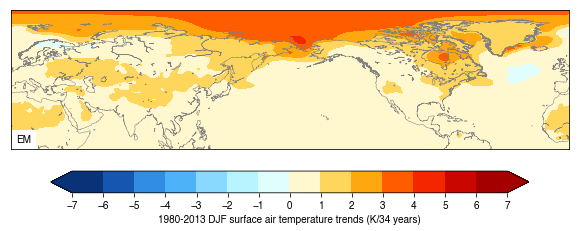

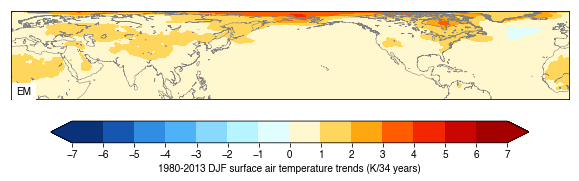

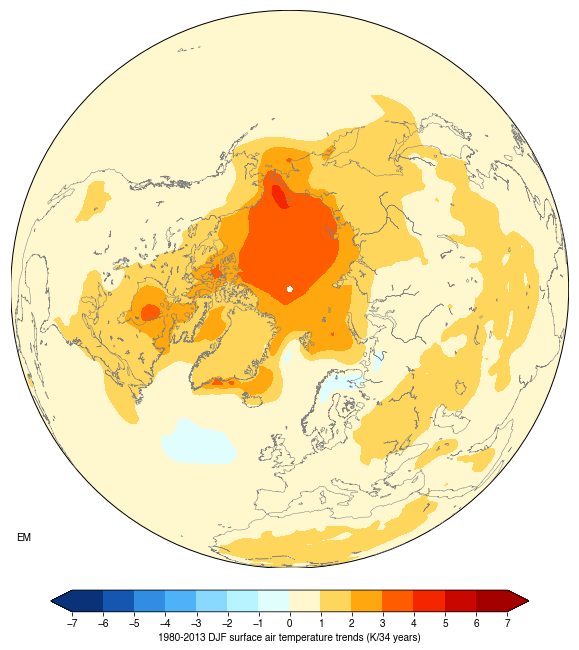

In [12]:
for mapLoop in (1,2,3):
    if mapLoop==1:
        bmap = basemap1
        dir_name = 'figures/' + str(year_bounds[0]) + '_' + str(year_bounds[1]) + '/figures_csv_cylProj'
    elif mapLoop==2:
        bmap = basemap2
        dir_name = 'figures/' + str(year_bounds[0]) + '_' + str(year_bounds[1]) + '/figures_csv_ceaProj'
    elif mapLoop==3:
        bmap = basemap3
        dir_name = 'figures/' + str(year_bounds[0]) + '_' + str(year_bounds[1]) + '/figures_csv_orthoProj'
    else:
        print('incorrect mapLoop')
        bmap = []

    #calculate trends
    num_years = np.size(data,1)
    trend_data_em = np.empty((np.size(data,2),np.size(data,3)))

    grid_lat = np.empty((np.size(data,2),np.size(data,3)))
    grid_lons = np.empty((np.size(data,2),np.size(data,3)))

    data_em = np.squeeze(np.mean(data,0))

    for ilat in np.arange(0,np.size(data,2)):
        for ilons in np.arange(0,np.size(data,3)):
            y = data_em[:,ilat,ilons]
            slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(0,np.size(data_em,0)),y)
            trend_data_em[ilat,ilons] = slope

            grid_lat[ilat,ilons] = lats[ilat]
            grid_lons[ilat,ilons] = lons[ilons]


    #plot the results
    trend_plot = trend_data_em[:,:]*num_years
    plt.figure(figsize=(10,20))
    cbar = drawOnGlobe(bmap,trend_plot,lats,lons,cmap=cmap)
    plt.annotate('EM', xy=(.01, .05), xycoords='axes fraction',backgroundcolor='white')
    cbar.set_label(str(year_bounds[0]) + '-' + str(year_bounds[1]) + ' DJF surface air temperature trends (K/' + str(num_years) + ' years)')
    plt.savefig(dir_name + '/data_trend_ensmean.png', dpi=dpi, format='png', frameon=False, bbox_inches='tight')
    plt.show()
    plt.close()

    # save to csv file
    np.savetxt(dir_name + '/data_trend_ensmean.csv', np.flipud(trend_plot), fmt='%.18f', delimiter=',', newline='\n')
    np.savetxt(dir_name + '/grid_lats.csv', np.flipud(grid_lat), fmt='%.18f', delimiter=',', newline='\n')
    np.savetxt(dir_name + '/grid_lons.csv', np.flipud(grid_lons), fmt='%.18f', delimiter=',', newline='\n')

## Observations - ERA-Interim

In [13]:
del data, years_all

filename = "/Users/eabarnes/GoogleDrive/WORK/RESEARCH/2018/TOE/data/npz_files/ERAI_t2m_seasonalmean_r240x120.npz"
data,lats,lons = readFiles(filename)
print(np.shape(data))

if(seasons):
    years_all = np.tile((np.arange(1979,2017)),(4,1))
    years_all = years_all.flatten(order='F')
else:
    years_all = np.arange(1979,2017)

#grab season
data = data[:,season_num::4]
years = years_all[season_num::4]

iyear = np.squeeze(np.where(np.logical_and(years>=year_bounds[0],years<=year_bounds[1])))
data = data[:,iyear,:,:]
print(years[iyear])

print(np.shape(data))

(1, 157, 120, 240)
[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013]
(1, 34, 120, 240)


In [14]:
# get basemap ready
dataReg, latsReg, lonsReg, basemap1 = getRegion1(data,lats,lons,lat_bounds,lon_bounds)
dataReg, latsReg, lonsReg, basemap2 = getRegion2(data,lats,lons,lat_bounds,lon_bounds)
dataReg, latsReg, lonsReg, basemap3 = getRegion3(data,lats,lons,lat_bounds,lon_bounds)

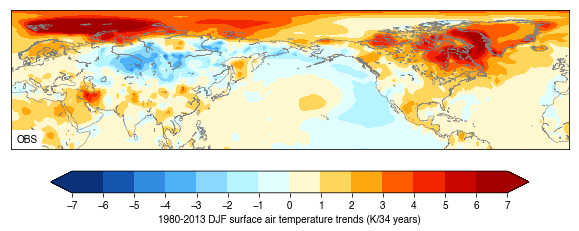

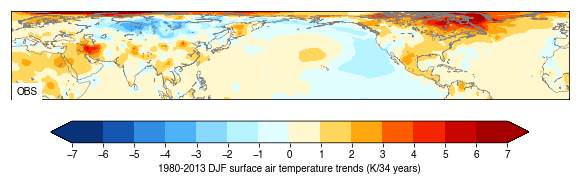

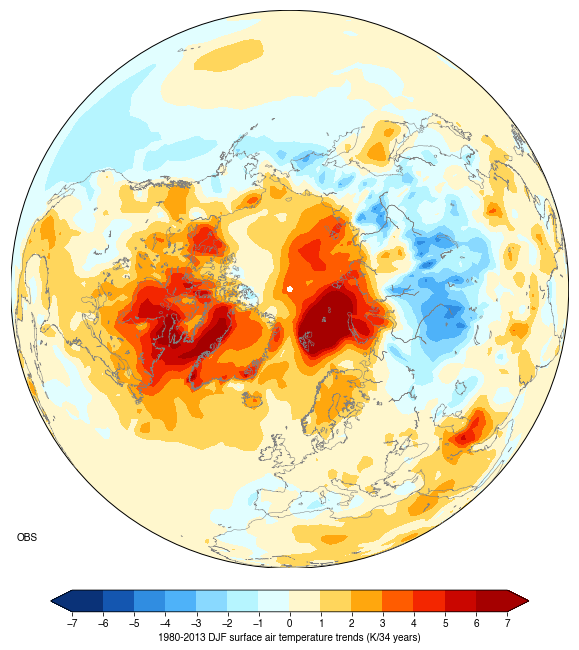

In [15]:
for mapLoop in (1,2,3):
    if mapLoop==1:
        bmap = basemap1
        dir_name = 'figures/' + str(year_bounds[0]) + '_' + str(year_bounds[1]) + '/figures_csv_cylProj'
    elif mapLoop==2:
        bmap = basemap2
        dir_name = 'figures/' + str(year_bounds[0]) + '_' + str(year_bounds[1]) + '/figures_csv_ceaProj'
    elif mapLoop==3:
        bmap = basemap3
        dir_name = 'figures/' + str(year_bounds[0]) + '_' + str(year_bounds[1]) + '/figures_csv_orthoProj'
    else:
        print('incorrect mapLoop')
        bmap = []

    #calculate trends
    num_years = np.size(data,1)
    trend_data_em = np.empty((np.size(data,2),np.size(data,3)))

    grid_lat = np.empty((np.size(data,2),np.size(data,3)))
    grid_lons = np.empty((np.size(data,2),np.size(data,3)))

    data_em = np.squeeze(np.mean(data,0))

    for ilat in np.arange(0,np.size(data,2)):
        for ilons in np.arange(0,np.size(data,3)):
            y = data_em[:,ilat,ilons]
            slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(0,np.size(data_em,0)),y)
            trend_data_em[ilat,ilons] = slope

            grid_lat[ilat,ilons] = lats[ilat]
            grid_lons[ilat,ilons] = lons[ilons]


    #plot the results
    trend_plot = trend_data_em[:,:]*num_years
    plt.figure(figsize=(10,20))
    cbar = drawOnGlobe(bmap,trend_plot,lats,lons,cmap=cmap)
    plt.annotate('OBS', xy=(.01, .05), xycoords='axes fraction',backgroundcolor='white')
    cbar.set_label(str(year_bounds[0]) + '-' + str(year_bounds[1]) + ' DJF surface air temperature trends (K/' + str(num_years) + ' years)')
    plt.savefig(dir_name + '/data_trend_erainterim.png', dpi=dpi, format='png', frameon=False, bbox_inches='tight')
    plt.show()
    plt.close()

    # save to csv file
    np.savetxt(dir_name + '/data_trend_erainterim.csv', np.flipud(trend_plot), fmt='%.18f', delimiter=',', newline='\n')
    #np.savetxt(dir_name + '/grid_lats.csv', np.flipud(grid_lat), fmt='%.18f', delimiter=',', newline='\n')
    #np.savetxt(dir_name + '/grid_lons.csv', np.flipud(grid_lons), fmt='%.18f', delimiter=',', newline='\n')